In [2]:
from datascience import *
import numpy as np
import math
%matplotlib inline

In [3]:
# old cleaning process to generate bay_area_data.csv
# data = Table().read_table('data/cps_00002.csv')

In [4]:
# extract San Francisco Metropolitan Area
#sf = data.where('METAREA', are.equal_to(7365))

In [5]:
# Extract Silicon Valley/San Jose Metropolitan Area
#sv = data.where('METAREA', are.equal_to(7401))

In [6]:
# bay_area = sf.append(sv)

In [7]:
# bay_area.to_df().to_csv('bay_area_data.csv', index=False)

In [8]:
bay_area = Table().read_table('data/bay_area_data.csv')
bay_area

YEAR,SERIAL,HWTSUPP,CPSID,ASECFLAG,HFLAG,METAREA,MONTH,PERNUM,CPSIDP,WTSUPP,SEX,RACE,OCC2010,INCTOT
2013,92957,2862.21,2.01112e+13,1,nan,7365,3,1,2.01112e+13,2862.21,1,100,9620,25000
2013,92957,2862.21,2.01112e+13,1,nan,7365,3,2,2.01112e+13,4541.27,1,100,6260,12011
2013,92957,2862.21,2.01112e+13,1,nan,7365,3,3,2.01112e+13,4513.16,1,100,6420,25000
2013,92957,2862.21,2.01112e+13,1,nan,7365,3,4,2.01112e+13,4513.16,1,100,9130,10000
2013,92959,2385.98,2.01212e+13,1,nan,7365,3,1,2.01212e+13,2385.98,2,652,3530,53515
2013,92959,2385.98,2.01212e+13,1,nan,7365,3,2,2.01212e+13,2385.98,1,652,3110,71000
2013,92959,2385.98,2.01212e+13,1,nan,7365,3,3,2.01212e+13,1661.4,2,652,9920,99999999
2013,92963,3137.8,2.01112e+13,1,nan,7365,3,1,2.01112e+13,3137.8,2,100,430,77800
2013,92963,3137.8,2.01112e+13,1,nan,7365,3,2,2.01112e+13,3309.68,1,100,4620,23520
2013,92963,3137.8,2.01112e+13,1,nan,7365,3,3,2.01112e+13,3309.68,1,100,4700,14120


In [9]:
# check to confirm that values are ints
type(bay_area.column(13).item(3))

int

Trying to make new table with only relevant jobs, then add corresponding Job Categories.

In [10]:
# array of all relevant job codes
# matching job categories are in Occupations spreadsheet in Google Drive
job_codes = make_array(10, 20, 30, 100, 110, 120, 130, 140, 150, 160, 220, 300, 310, 330, 350, 360, 410, 420,
                      620, 700, 710, 720, 730, 800, 820, 940, 950, 1000, 1010, 1020, 1050, 1060, 1100, 1200, 1220,
                       1230, 1240, 1350, 1360, 1400, 1410, 1420, 1430, 1450, 1460, 1540, 1550, 1720, 1910, 1920,
                       1980, 2840, 2900, 4000, 4010, 4030, 4050, 4060, 4110, 4120, 4130, 4140, 4150, 4200, 4210,
                       4220, 4230, 4250, 4720, 5000, 7720, 7730, 7900, 8000, 8010, 8030, 8060, 8800, 8830, 7700,
                       9620, 9630, 9640)
job_codes

array([  10,   20,   30,  100,  110,  120,  130,  140,  150,  160,  220,
        300,  310,  330,  350,  360,  410,  420,  620,  700,  710,  720,
        730,  800,  820,  940,  950, 1000, 1010, 1020, 1050, 1060, 1100,
       1200, 1220, 1230, 1240, 1350, 1360, 1400, 1410, 1420, 1430, 1450,
       1460, 1540, 1550, 1720, 1910, 1920, 1980, 2840, 2900, 4000, 4010,
       4030, 4050, 4060, 4110, 4120, 4130, 4140, 4150, 4200, 4210, 4220,
       4230, 4250, 4720, 5000, 7720, 7730, 7900, 8000, 8010, 8030, 8060,
       8800, 8830, 7700, 9620, 9630, 9640])

In [11]:
jobs = Table().with_column('Jobs', job_codes)
jobs

Jobs
10
20
30
100
110
120
130
140
150
160


In [12]:
import pandas as pd

df = bay_area.to_df()
bay_area = Table.from_df(df.loc[df['OCC2010'].isin(job_codes)])
bay_area

YEAR,SERIAL,HWTSUPP,CPSID,ASECFLAG,HFLAG,METAREA,MONTH,PERNUM,CPSIDP,WTSUPP,SEX,RACE,OCC2010,INCTOT
2013,92957,2862.21,2.01112e+13,1,nan,7365,3,1,2.01112e+13,2862.21,1,100,9620,25000
2013,92966,1636.31,2.01112e+13,1,nan,7365,3,1,2.01112e+13,1636.31,1,100,220,74645
2013,92966,1636.31,2.01112e+13,1,nan,7365,3,3,2.01112e+13,1589.28,2,100,4110,6240
2013,92967,3141.2,2.01112e+13,1,nan,7365,3,3,2.01112e+13,3384.73,1,100,1050,0
2013,92969,3068.09,2.01112e+13,1,nan,7365,3,1,2.01112e+13,3068.09,1,100,1410,115421
2013,92970,2892.39,2.01112e+13,1,nan,7365,3,1,2.01112e+13,2892.39,1,100,1020,117865
2013,92973,1562.79,2.01112e+13,1,nan,7365,3,1,2.01112e+13,1562.79,1,100,4220,29017
2013,92976,1748.64,2.01112e+13,1,nan,7365,3,1,2.01112e+13,1748.64,2,651,350,130030
2013,92980,1684.33,2.01112e+13,1,nan,7365,3,3,2.01112e+13,2157.3,2,651,720,571
2013,92983,3266.71,2.01112e+13,1,nan,7365,3,2,2.01112e+13,3406.81,1,100,9620,19825


In [13]:
cut_bay_area= bay_area.drop("CPSID","ASECFLAG","HWTSUPP", "HFLAG", "MONTH", "PERNUM", "CPSIDP","WTSUPP")
cut_bay_area

YEAR,SERIAL,METAREA,SEX,RACE,OCC2010,INCTOT
2013,92957,7365,1,100,9620,25000
2013,92966,7365,1,100,220,74645
2013,92966,7365,2,100,4110,6240
2013,92967,7365,1,100,1050,0
2013,92969,7365,1,100,1410,115421
2013,92970,7365,1,100,1020,117865
2013,92973,7365,1,100,4220,29017
2013,92976,7365,2,651,350,130030
2013,92980,7365,2,651,720,571
2013,92983,7365,1,100,9620,19825


In [14]:
STEM_codes= make_array(700, 1000, 1010, 1020, 1050, 1220, 1230, 1240, 1350, 1360, 1400, 1410, 1420, 1430,
    1450,1460, 1540, 1550, 1720, 1910, 1920, 1980,2840, 2900,7720, 7730, 7900, 8000, 8010,8030,
    8060, 8800, 8830)
SERVICE_codes= make_array(7700, 9620, 9630, 9640, 4000, 4010, 4030, 4050, 4060, 4110, 4120, 4130, 4140, 4150, 4720, 
    7700,9620,9630,9640)
FINANCIAL_codes= make_array(120, 800, 820, 940, 950)
CUSTODIAL_codes= make_array(4200, 4210, 4220, 4230, 4250)
MANAGEMENT_codes= make_array(130, 150, 160, 220, 30, 100, 410, 420)
STEM_MANAGER_codes=make_array(140,300,330, 350, 360, 1060, 1100)
ADMINISTRATOR_codes= make_array(10,20)
sector=list()
def job_categories2(x): 
    if any(x == i for i in STEM_codes):
        sector.append("STEM")
    elif any(x == i for i in SERVICE_codes):
        sector.append("SERVICE")
    elif any(x == i for i in FINANCIAL_codes):
        sector.append("FINANCIAL")
    elif any(x == i for i in CUSTODIAL_codes):
        sector.append("CUSTODIAL")
    elif any(x == i for i in MANAGEMENT_codes):
        sector.append("MANAGEMENT")
    elif any(x == i for i in ADMINISTRATOR_codes):
        sector.append("ADMINISTRATOR")
    elif any(x == i for i in STEM_MANAGER_codes):
        sector.append("STEM MANAGER")
    else: 
        sector.append("UNKNOWN")


for job in cut_bay_area.column("OCC2010"):
    job_categories2(job)
    
sector

['SERVICE',
 'MANAGEMENT',
 'SERVICE',
 'STEM',
 'STEM',
 'STEM',
 'CUSTODIAL',
 'STEM MANAGER',
 'UNKNOWN',
 'SERVICE',
 'STEM MANAGER',
 'STEM',
 'STEM',
 'SERVICE',
 'STEM MANAGER',
 'CUSTODIAL',
 'STEM',
 'FINANCIAL',
 'MANAGEMENT',
 'STEM',
 'STEM',
 'CUSTODIAL',
 'SERVICE',
 'UNKNOWN',
 'SERVICE',
 'SERVICE',
 'CUSTODIAL',
 'STEM',
 'FINANCIAL',
 'UNKNOWN',
 'STEM MANAGER',
 'FINANCIAL',
 'FINANCIAL',
 'STEM',
 'FINANCIAL',
 'STEM',
 'UNKNOWN',
 'STEM',
 'MANAGEMENT',
 'STEM',
 'STEM',
 'MANAGEMENT',
 'STEM',
 'STEM',
 'CUSTODIAL',
 'STEM MANAGER',
 'SERVICE',
 'FINANCIAL',
 'MANAGEMENT',
 'STEM',
 'SERVICE',
 'CUSTODIAL',
 'CUSTODIAL',
 'SERVICE',
 'SERVICE',
 'SERVICE',
 'ADMINISTRATOR',
 'MANAGEMENT',
 'MANAGEMENT',
 'UNKNOWN',
 'FINANCIAL',
 'STEM MANAGER',
 'STEM MANAGER',
 'CUSTODIAL',
 'SERVICE',
 'STEM',
 'STEM',
 'STEM',
 'UNKNOWN',
 'SERVICE',
 'CUSTODIAL',
 'CUSTODIAL',
 'STEM MANAGER',
 'SERVICE',
 'STEM',
 'SERVICE',
 'MANAGEMENT',
 'STEM',
 'STEM',
 'CUSTODIAL',
 'F

In [94]:
#sector_df = sector.to_df
with_sector = cut_bay_area.with_column('SECTOR', sector)
with_sector

YEAR,SERIAL,METAREA,SEX,RACE,OCC2010,INCTOT,SECTOR
2013,92957,7365,1,100,9620,25000,SERVICE
2013,92966,7365,1,100,220,74645,MANAGEMENT
2013,92966,7365,2,100,4110,6240,SERVICE
2013,92967,7365,1,100,1050,0,STEM
2013,92969,7365,1,100,1410,115421,STEM
2013,92970,7365,1,100,1020,117865,STEM
2013,92973,7365,1,100,4220,29017,CUSTODIAL
2013,92976,7365,2,651,350,130030,STEM MANAGER
2013,92980,7365,2,651,720,571,UNKNOWN
2013,92983,7365,1,100,9620,19825,SERVICE


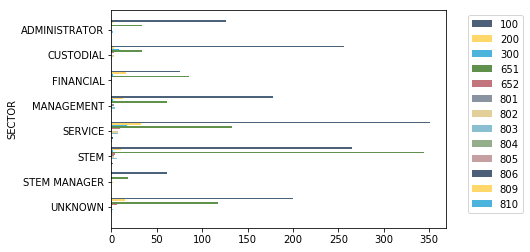

In [105]:
# plot sector+race
t = with_sector.drop("INCTOT", "METAREA", "SERIAL","YEAR","OCC2010", 'SEX')
t = t.pivot("RACE", "SECTOR")
t.barh('SECTOR')

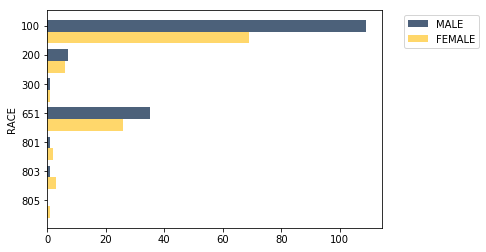

In [92]:
management_jobs = with_sector.where("SECTOR", are.equal_to("MANAGEMENT")).drop("INCTOT", "SECTOR", "METAREA", "SERIAL","YEAR","OCC2010")
management_jobs = management_jobs.pivot("SEX", "RACE").relabel("1", "MALE"). relabel("2", "FEMALE")
management_jobs.barh('RACE')

In [17]:
stem_jobs=with_sector.where("SECTOR", are.equal_to("STEM"))
stem_jobs

YEAR,SERIAL,METAREA,SEX,RACE,OCC2010,INCTOT,SECTOR
2013,92967,7365,1,100,1050,0,STEM
2013,92969,7365,1,100,1410,115421,STEM
2013,92970,7365,1,100,1020,117865,STEM
2013,92984,7365,2,651,1020,44000,STEM
2013,92985,7365,1,100,1020,108040,STEM
2013,92990,7365,1,100,1460,105423,STEM
2013,92994,7365,1,651,1020,70000,STEM
2013,92994,7365,1,651,1240,80000,STEM
2013,93017,7365,1,803,1050,85000,STEM
2013,93034,7365,2,651,1020,95030,STEM


In [18]:
custodial_jobs=with_sector.where("SECTOR", are.equal_to("CUSTODIAL"))
custodial_jobs

YEAR,SERIAL,METAREA,SEX,RACE,OCC2010,INCTOT,SECTOR
2013,92973,7365,1,100,4220,29017,CUSTODIAL
2013,92988,7365,1,100,4200,50000,CUSTODIAL
2013,92996,7365,1,651,4220,0,CUSTODIAL
2013,93014,7365,2,100,4230,0,CUSTODIAL
2013,93059,7365,2,100,4230,32000,CUSTODIAL
2013,93068,7365,2,100,4230,23000,CUSTODIAL
2013,93068,7365,1,100,4230,5000,CUSTODIAL
2013,93106,7365,1,100,4210,30100,CUSTODIAL
2013,93118,7365,1,100,4220,40000,CUSTODIAL
2013,93118,7365,2,100,4220,25000,CUSTODIAL


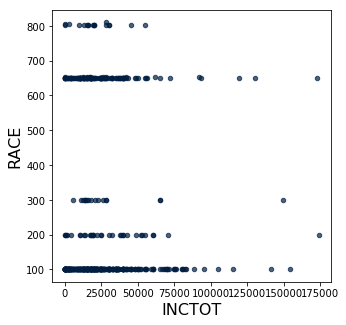

In [19]:
service_jobs=with_sector.where("SECTOR", are.equal_to("SERVICE"))
service_jobs.scatter("INCTOT", "RACE")

In [20]:
financial_jobs=with_sector.where("SECTOR", are.equal_to("FINANCIAL"))
financial_jobs

YEAR,SERIAL,METAREA,SEX,RACE,OCC2010,INCTOT,SECTOR
2013,92991,7365,1,651,120,80005,FINANCIAL
2013,93020,7365,2,651,800,60000,FINANCIAL
2013,93026,7365,2,200,800,51808,FINANCIAL
2013,93033,7365,2,651,800,53750,FINANCIAL
2013,93035,7365,2,100,120,230999,FINANCIAL
2013,93064,7365,2,651,800,61015,FINANCIAL
2013,93094,7365,1,200,800,200025,FINANCIAL
2013,93131,7365,2,200,800,112144,FINANCIAL
2013,93131,7365,2,200,800,71442,FINANCIAL
2013,93151,7365,1,100,800,151404,FINANCIAL


In [21]:
stemmanager_jobs=with_sector.where("SECTOR", are.equal_to("STEM MANAGER"))
stemmanager_jobs

YEAR,SERIAL,METAREA,SEX,RACE,OCC2010,INCTOT,SECTOR
2013,92976,7365,2,651,350,130030,STEM MANAGER
2013,92984,7365,1,651,1100,113211,STEM MANAGER
2013,92986,7365,1,100,140,153588,STEM MANAGER
2013,93023,7365,1,651,140,220005,STEM MANAGER
2013,93063,7365,1,100,140,39010,STEM MANAGER
2013,93099,7365,2,651,350,86000,STEM MANAGER
2013,93105,7365,1,100,140,29000,STEM MANAGER
2013,93120,7365,1,100,300,156043,STEM MANAGER
2013,93225,7365,2,802,140,104359,STEM MANAGER
2013,93238,7365,1,100,300,150000,STEM MANAGER


In [22]:
administrator_jobs=with_sector.where("SECTOR", are.equal_to("ADMINISTRATOR"))
administrator_jobs

YEAR,SERIAL,METAREA,SEX,RACE,OCC2010,INCTOT,SECTOR
2013,93078,7365,1,100,20,177200,ADMINISTRATOR
2013,93144,7365,1,100,20,37000,ADMINISTRATOR
2013,93310,7365,2,100,10,77200,ADMINISTRATOR
2013,93328,7365,2,100,10,15903,ADMINISTRATOR
2013,93379,7365,1,100,20,1325223,ADMINISTRATOR
2013,93389,7365,1,100,10,91800,ADMINISTRATOR
2013,93392,7365,1,100,10,289999,ADMINISTRATOR
2013,93401,7365,1,651,20,25029,ADMINISTRATOR
2013,93419,7365,1,100,10,331170,ADMINISTRATOR
2013,93422,7365,1,100,10,405677,ADMINISTRATOR


In [ ]:
#INCOME histogram white women vs. other races of women managers, p value test ~somewhere~ 
#MALES vs FEMALES in the same place, average income of POC to the distribution MEN, bootstrap 